<h1 align="center">Assignment 1</h1>

<p><strong>Nama:</strong> Muhammad Rinande Ansutia<br>
   <strong>No:</strong> PYTN-KS19-021<br>
   <strong>Dataset:</strong> London Crime Data, 2008-2016</p>

# Project Overview
This dataset contains Crime in large metropolitan areas, such as London, occurs in different patterns. This data includes the number of crime reports by month, LSOA region, and major/minor category from January 2008-December 2016.

#### The dataset contains: 
- <strong>lsoa_code :</strong> this represents a policing area
- <strong>borough :</strong> the london borough for which the statistic is related
- <strong>major_category :</strong> the major crime category
- <strong>minor_category :</strong> the minor crime category
- <strong>value :</strong> the count of the crime for that particular borough, in that particular month
- <strong>year :</strong> the year of the summary statistic
- <strong>month :</strong> the month of the summary statistic

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import folium

## Preprocessing

In [2]:
# read the dataset
df = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
# menampilkan 5 data teratas dalam dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# menampilkan 5 data terbawah dalam dataset
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
df.shape

(13490604, 7)

Dapat diketahui terdapat 13490604 data dengan 7 kolom

In [6]:
# menampilkan informasi type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Dapat diketahui:
- lsoa_code, borough, major_category, minor_category: memiliki tipe data string
- value, year, month: memiliki tipe data integer

In [7]:
# memeriksa data apakah memiliki objek null
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Menurut hasil di atas, dataset tidak memiliki objek null

Dapat dilihat bahwa kolom losa_code tidak terlalu diperlukan sehingga perlu di drop agar data nya lebih bersih dan tidak terjadi duplikat data.

In [8]:
df.drop('lsoa_code', axis=1, inplace=True)
df.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


# Visualisasi Data

## Area Plot

Pertanyaan: Borough mana yang dianggap paling aman berdasarkan jumlah kejahatan terendah dalam 1 tahun terakhir (2016) di London?"

In [9]:
# Menyaring data untuk tahun 2016
df_last_year = df[df['year'] == 2016]

# Menghitung jumlah kejahatan untuk setiap borough
crime_by_borough = df_last_year.groupby('borough')['value'].sum().sort_values()

# Menampilkan DataFrame
df_crime_by_borough = pd.DataFrame(crime_by_borough).reset_index()
df_crime_by_borough.columns = ['Borough', 'Jumlah Kejahatan']

# Mencetak DataFrame
df_crime_by_borough

,Borough,Jumlah Kejahatan
0,City of London,178
1,Kingston upon Thames,9983
2,Sutton,10658
3,Richmond upon Thames,11074
4,Merton,12755
5,Bexley,12840
6,Harrow,13153
7,Barking and Dagenham,16741
8,Havering,16903
9,Redbridge,19502


Data di atas menunjukkan jumlah kejahatan berdasarkan wilayah dalam satu tahun terakhir, yang mana data tersebut diurutkan berdasarkan jumlah kejahatan dari yang terendah

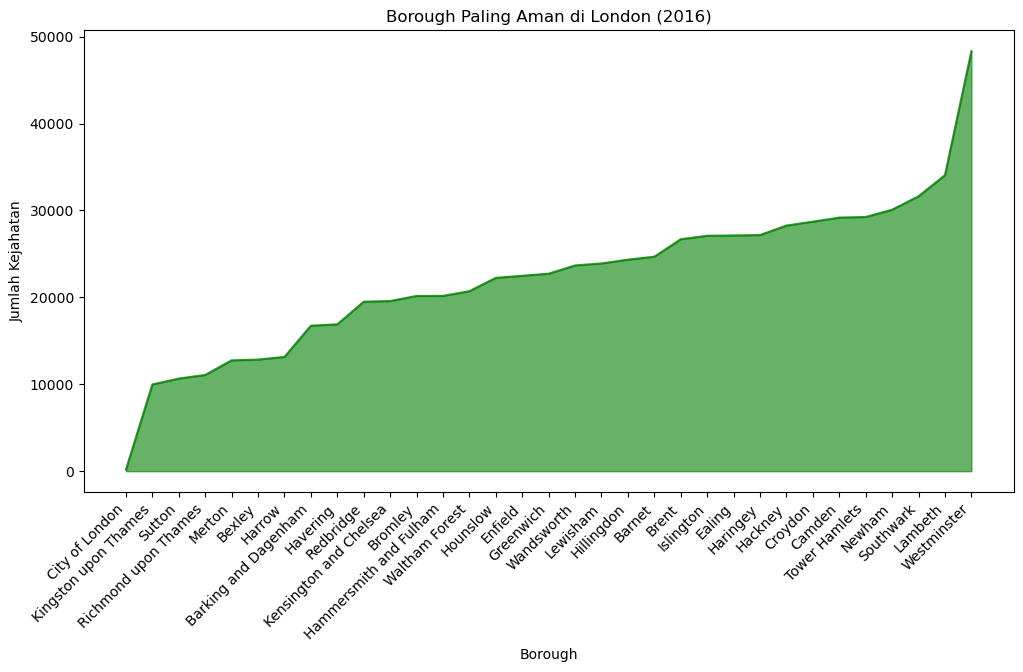

In [10]:
# Membuat visualisasi area plot
plt.figure(figsize=(12, 6))
plt.fill_between(crime_by_borough.index, crime_by_borough, color='green', alpha=0.6)
plt.plot(crime_by_borough.index, crime_by_borough, color='green', alpha=0.8)
plt.title('Borough Paling Aman di London (2016)')
plt.xlabel('Borough')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=45, ha='right')
plt.show()

Kesimpulan: Setelah melakukan penyaringan dan visualisasi data, maka didapatkan kesimpulan bahwa borough yang paling minim kejahatan dalam satu tahun terakhir yaitu City of London dengan jumlah 178 kasus dan yang paling banyak terjadi kejahatan dalam satu tahun terakhir yaitu Westminster dengan jumlah 48330 kasus.

## Histogram

Pertanyaan: Jumlah Kejahatan yang terjadi di 3 kota Southwark, Lambeth, dan Westminster berdasarkan major kategory pada tahun 2008-2016

In [11]:
# Daftar borough yang ingin ditampilkan
boroughs_to_visualize = ['Southwark', 'Lambeth', 'Westminster']

# Filter dataframe untuk borough-borough yang dipilih
df_selected_boroughs = df[df['borough'].isin(boroughs_to_visualize)]

# Group by major_category dan borough, kemudian ambil jumlah kejahatan
crime_by_major_category = df_selected_boroughs.groupby(['major_category', 'borough']).sum()['value'].unstack()
crime_by_major_category

borough,Lambeth,Southwark,Westminster
major_category,,,
Burglary,30199,27980,29295
Criminal Damage,26136,24450,20405
Drugs,25083,27381,34031
Fraud or Forgery,137,321,273
Other Notifiable Offences,4520,4696,6148
Robbery,18408,16153,15752
Sexual Offences,70,40,59
Theft and Handling,114899,109432,277617
Violence Against the Person,72726,68356,71448


Data di atas menunjukkan bahwa jumlah kejahatan yang terjadi pada tiga kota Southwark, Lambeth, dan Westminster. Jumlah kejahaatan tersebut berdasarkan major category.

<Figure size 1200x800 with 0 Axes>

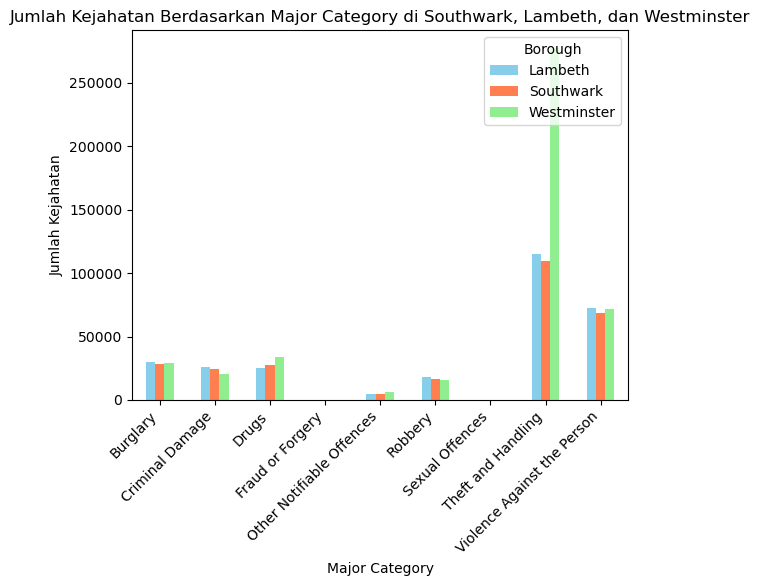

In [12]:
# Daftar borough yang ingin ditampilkan
boroughs_to_visualize = ['Southwark', 'Lambeth', 'Westminster']

# Filter dataframe untuk borough-borough yang dipilih
df_selected_boroughs = df[df['borough'].isin(boroughs_to_visualize)]

# Group by major_category dan borough, kemudian ambil jumlah kejahatan
crime_by_major_category = df_selected_boroughs.groupby(['major_category', 'borough']).sum()['value'].unstack()

# Plot histogram
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'coral', 'lightgreen']  # Warna untuk setiap borough
crime_by_major_category.plot(kind='bar', color=colors)
plt.title('Jumlah Kejahatan Berdasarkan Major Category di Southwark, Lambeth, dan Westminster')
plt.xlabel('Major Category')
plt.ylabel('Jumlah Kejahatan')
plt.legend(title='Borough', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Agar label x-axis tidak tumpang tindih
plt.show()

Kesimpulan: dapat disimpulkan bahwa dalam tiga borough jenis kejahatan berdasarkan major category yang paling banyak terjadi adalah Theft and Handling di Westminster. Sebaliknya yang paling sedikit terjadi adalah jenis kejahatan Sexual Offences.

## Bar Chart

Pertanyaan: Jumlah kejahatan per wilayah dari tahun 2008-2016

In [13]:
# Kelompokkan berdasarkan wilayah dan hitung total kejahatan
jumlah_kejahatan_per_wilayah = df.groupby('borough')['value'].sum()

# Urutkan data secara menurun
jumlah_kejahatan_per_wilayah = jumlah_kejahatan_per_wilayah.sort_values(ascending=False)
jumlah_kejahatan_per_wilayah

borough
Westminster               455028
Lambeth                   292178
Southwark                 278809
Camden                    275147
Newham                    262024
Croydon                   260294
Ealing                    251562
Islington                 230286
Tower Hamlets             228613
Brent                     227551
Hackney                   217119
Lewisham                  215137
Haringey                  213272
Barnet                    212191
Hillingdon                209680
Wandsworth                204741
Waltham Forest            203879
Enfield                   193880
Hounslow                  186772
Hammersmith and Fulham    185259
Bromley                   184349
Redbridge                 183562
Greenwich                 181568
Kensington and Chelsea    171981
Barking and Dagenham      149447
Havering                  138947
Harrow                    116848
Merton                    115654
Bexley                    114136
Sutton                    100987
Ri

Data di atas menunjukkan jumlah kejahatan per wilayah dari tahun 2008-2016

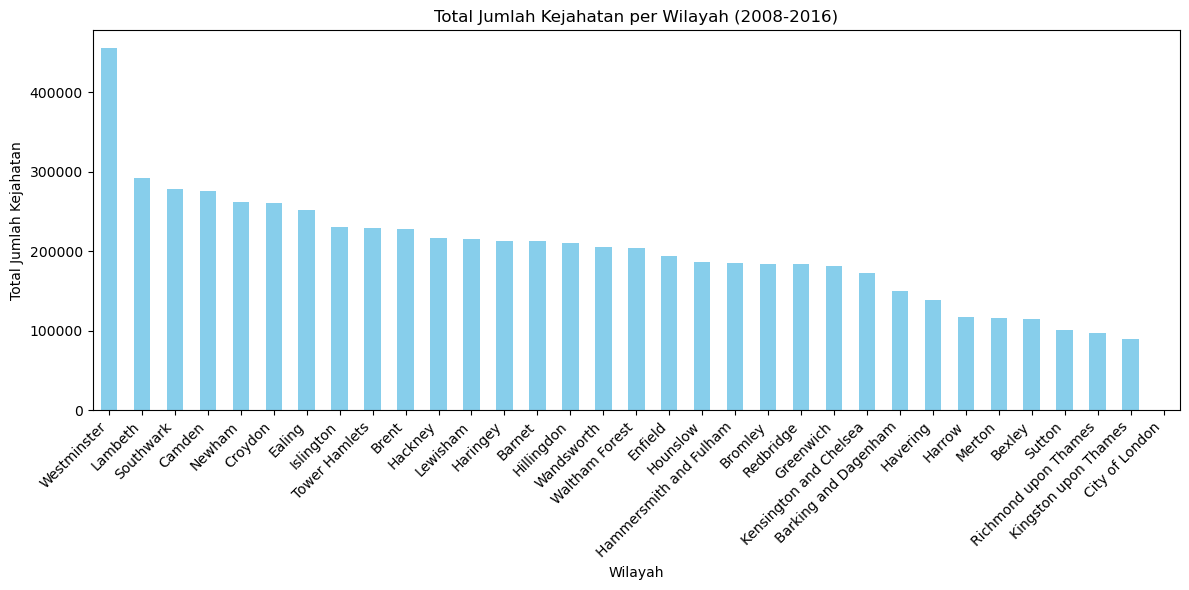

In [14]:
# Buat diagram batang
plt.figure(figsize=(12, 6))
jumlah_kejahatan_per_wilayah.plot(kind='bar', color='skyblue')
plt.title('Total Jumlah Kejahatan per Wilayah (2008-2016)')
plt.xlabel('Wilayah')
plt.ylabel('Total Jumlah Kejahatan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kesimpulan: dapat diambil kesimpulan bahwa dari tahun 2008-2016 wilayah yang paling banyak mengalami tindak kriminal adalah wilayah Westminster, sedangkan yang paling sedikit yaitu wilayah City of London.

## Pie Chart

Pertanyaan: Jenis kejahatan mana yang paling banyak terjadi di semua wilayah dari tahun 2008 sampai 2016?

In [15]:
# Mengelompokkan data berdasarkan major_category dan menghitung total count
major_category_counts = df.groupby('major_category')['value'].sum()

# Menghitung persentase
total_crimes = major_category_counts.sum()
major_category_percentages = major_category_counts / total_crimes * 100
major_category_percentages

major_category
Burglary                       11.698531
Criminal Damage                 9.785386
Drugs                           7.301220
Fraud or Forgery                0.082587
Other Notifiable Offences       1.649395
Robbery                         4.014930
Sexual Offences                 0.019743
Theft and Handling             41.283513
Violence Against the Person    24.164694
Name: value, dtype: float64

Data diatas menunjukkan persentase setiap jenis kejahatan yang paling banyak terjadi di semua wilayah dari tahun 2008-2016

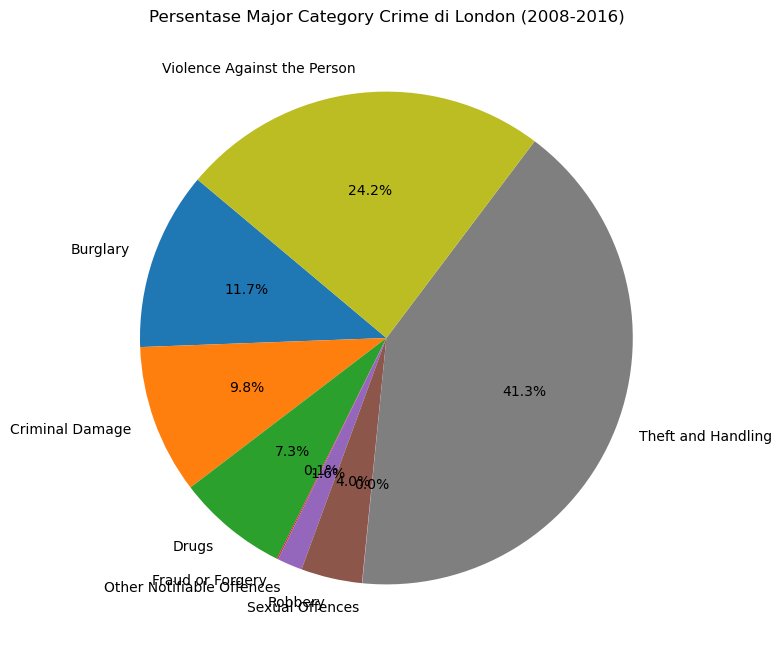

In [16]:
# Membuat pie chart
plt.figure(figsize=(10, 8))
plt.pie(major_category_percentages, labels=major_category_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Major Category Crime di London (2008-2016)')
plt.show()

Kesimpulan: dapat diambil kesimpulan bahwa jenis kejahatan yang paling banyak terjadi dari tahun 2008-2016 di semua wilayah yaitu Theft and Handling dengan persentase 41,3 %, sedangkan yang paling sedikit terjadi yaitu Sexual Offences dengan persentase 0,01 %.

## Box Plot

Pertanyaan: Bagaimana distribusi statistik dari data jumlah tindak kriminal di wilayah Westminster pada tahun 2008-2016?

In [17]:
# menunjukkan data di wilayah Westminster
westminster_data = df[df["borough"] == 'Westminster']
westminster_data = westminster_data.sort_values(['value'], ascending=False).copy()
# menunjukkan 5 data teratas
westminster_data.head()

,borough,major_category,minor_category,value,year,month
13423472,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,Westminster,Theft and Handling,Other Theft,281,2009,1
2932492,Westminster,Theft and Handling,Other Theft,280,2011,12


In [18]:
# mengelompokkan data year dan value berdasarkan year
westminster_data_crime = westminster_data[['year', 'value']].groupby(['year']).agg({'value': 'sum'})
# reset index
westminster_data_crime.reset_index()

,year,value
0,2008,47846
1,2009,48456
2,2010,48116
3,2011,54243
4,2012,59226
5,2013,53852
6,2014,47564
7,2015,47395
8,2016,48330


In [19]:
# Menampilkan statistika deskriptif dari data
westminster_data_crime.describe()

,value
count,9.000000
mean,50558.666667
std,4201.683918
min,47395.000000
25%,47846.000000
50%,48330.000000
75%,53852.000000
max,59226.000000


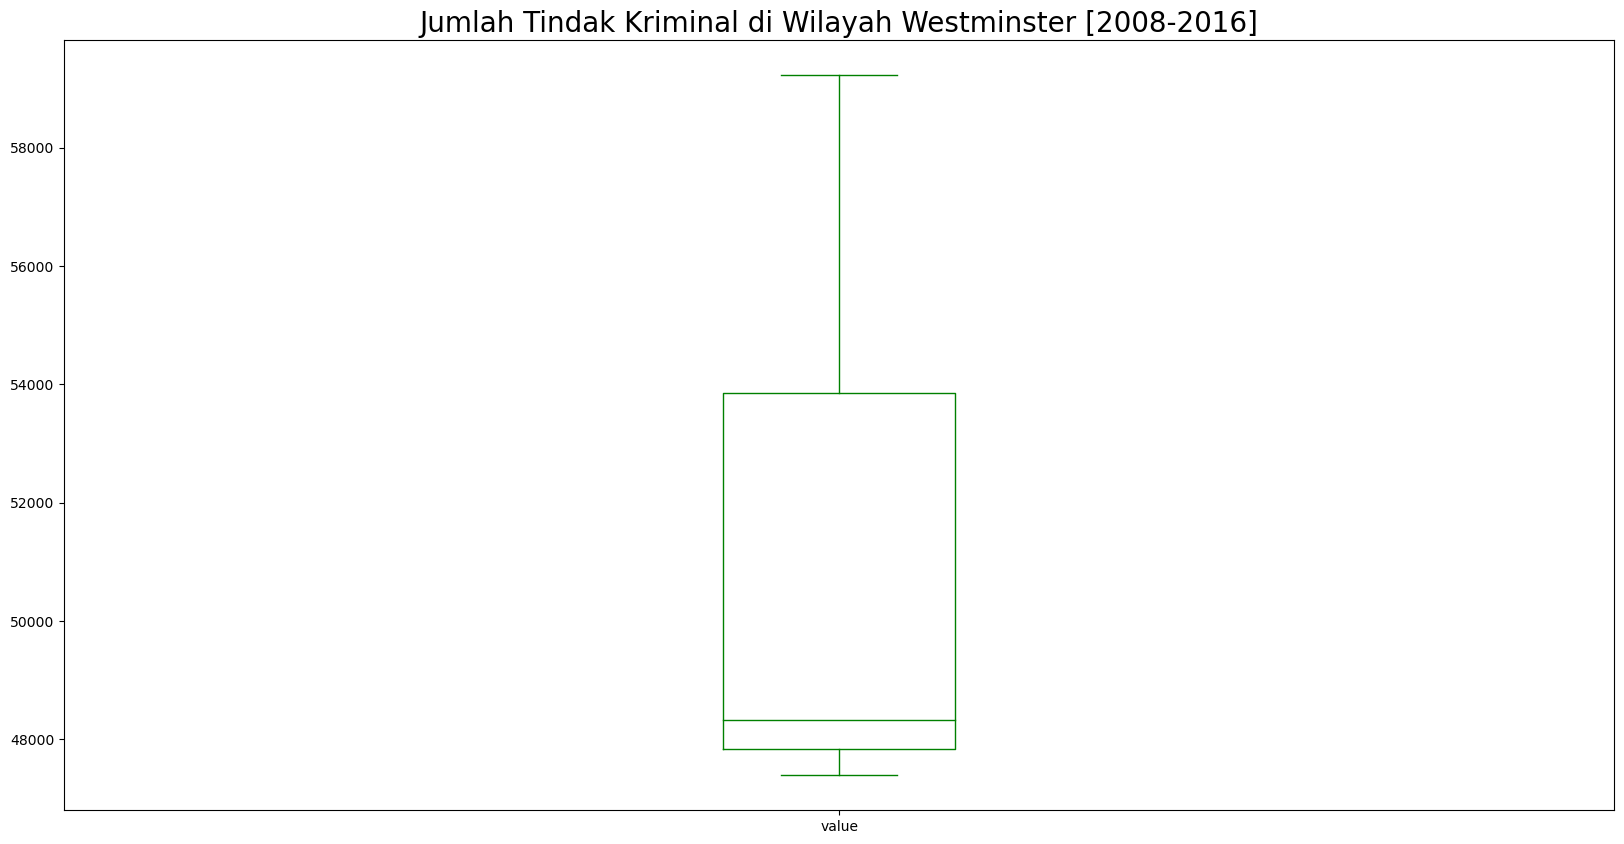

In [20]:
# inisiasi box plot
westminster_data_crime.plot(kind="box", figsize=(20,10), color = "green")
# membuat nama judul box plot
plt.title("Jumlah Tindak Kriminal di Wilayah Westminster [2008-2016]", fontsize=20)
#menampilkan box plot
plt.show()

Kesimpulan, jumlah tindak kriminalitas di wilayah Westminster pada periode 2008-2016 berkisar diantara 47395 hingga 59226 dengann rata-rata 50558.666667.

## Scatter Plot

Pertanyaan: Bagaimana persebaran kasus theft and handling di kota westminster pada tahun 2008?

In [21]:
# Filter data untuk kota Westminster pada tahun 2008 dan kategori kejahatan Theft and Handling
westminster_theft_2008 = df[(df['borough'] == 'Westminster') & 
                            (df['year'] == 2008) & 
                            (df['major_category'] == 'Theft and Handling')]
westminster_theft_2008

,borough,major_category,minor_category,value,year,month
280,Westminster,Theft and Handling,Theft From Shops,5,2008,8
751,Westminster,Theft and Handling,Other Theft,11,2008,9
1841,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,0,2008,5
2084,Westminster,Theft and Handling,Theft From Shops,0,2008,5
2804,Westminster,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2008,7
...,...,...,...,...,...,...
13484917,Westminster,Theft and Handling,Handling Stolen Goods,0,2008,6
13485576,Westminster,Theft and Handling,Other Theft Person,3,2008,4
13487443,Westminster,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2008,8
13489028,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,0,2008,8


In [22]:
# melihat data pada wilayah Westminster
data_Westminster = westminster_theft_2008[westminster_theft_2008["borough"] == 'Westminster']
data_Westminster.sort_values(['value'], ascending=False, axis=0, inplace=True)
data_Westminster

,borough,major_category,minor_category,value,year,month
13423472,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,Westminster,Theft and Handling,Other Theft,286,2008,12
7942318,Westminster,Theft and Handling,Other Theft,267,2008,7
7930489,Westminster,Theft and Handling,Other Theft,254,2008,2
...,...,...,...,...,...,...
6579777,Westminster,Theft and Handling,Theft From Shops,0,2008,6
6578500,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,0,2008,5
6577615,Westminster,Theft and Handling,Theft From Shops,0,2008,1
6575277,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,0,2008,8


In [23]:
# menghapus kolom yang tidak diperlukan
kol2 = ["borough","major_category","minor_category"]
westminster_theft_2008_sc = data_Westminster.drop(kol2, axis=1).set_index("year")
# set index
westminster_theft_2008_sc = westminster_theft_2008_sc.reset_index().drop("year", axis=1)
westminster_theft_2008_sc = westminster_theft_2008_sc.groupby("month").sum()
westminster_theft_2008_sc = westminster_theft_2008_sc.reset_index()
westminster_theft_2008_sc

,month,value
0,1,2407
1,2,2327
2,3,2418
3,4,2301
4,5,2278
5,6,2299
6,7,2754
7,8,2458
8,9,2180
9,10,2595


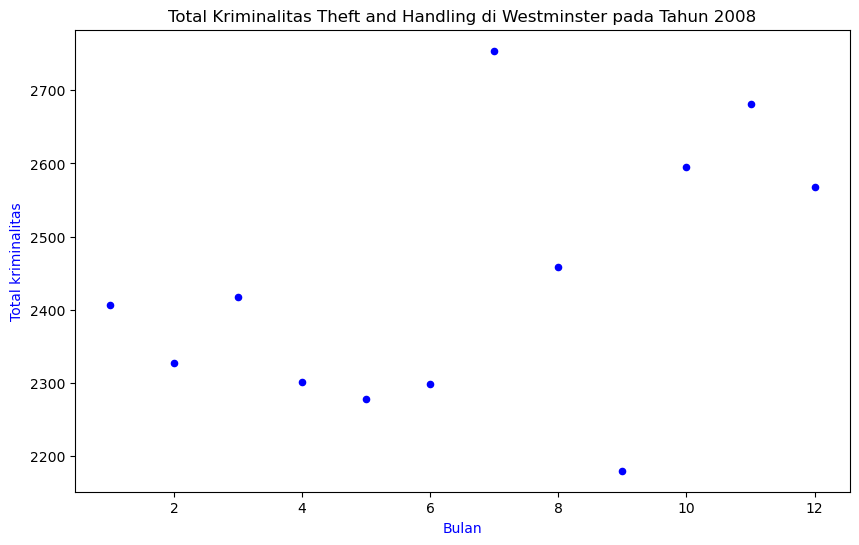

In [24]:
# inisiasi scatter plot
westminster_theft_2008_sc.plot(kind='scatter', x='month', y='value', figsize=(10,6), color='blue')
# membuat judul
plt.title('Total Kriminalitas Theft and Handling di Westminster pada Tahun 2008')
# membuat nama xlabel
plt.xlabel('Bulan', color='blue')
# membuat nama ylabel
plt.ylabel('Total kriminalitas', color='blue')
# menampilkan plot
plt.show()

Kesimpulan, berdasarkan dataset jumlah kasus Theft and Handling di kota Westminster pada tahun 2008, tampak bahwa terjadi fluktuasi yang signifikan dalam jumlah kasus setiap bulannya. Jumlah kasus mencapai puncak tertinggi pada bulan Juli, mencatatkan 2754 kasus, sementara bulan-bulan lainnya memiliki angka yang lebih rendah. Analisis data menunjukkan adanya kecenderungan peningkatan jumlah kasus di pertengahan tahun, terutama dari Maret hingga Juli. Selanjutnya, ditemukan fluktuasi yang cukup besar menjelang akhir tahun, khususnya di bulan Oktober hingga Desember

## Word Clouds

Pertanyaan: Jenis kriminalitas tingkat major apa yang sering terjadi di London pada tahun 2008-2016?

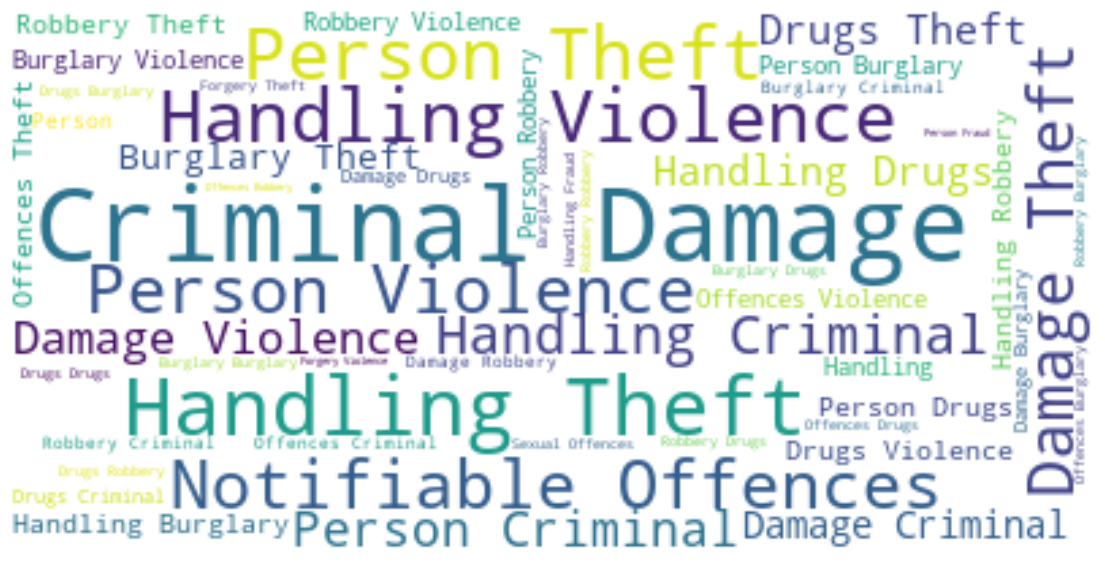

In [25]:
wordClouds = df['major_category']
stopwords = set(STOPWORDS)
london_wc = WordCloud(background_color='white',stopwords=stopwords)

london_wc.generate(' '.join(wordClouds.values))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(20) # set height

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Kesimpulan, berdasarkan visualisasi Word Clouds kata-kata yang berukuran besar merupakan tindak kejahatan yang paling sering terjadi di London pada periode 2008-2016. Kata-kata tersebut adalah Criminal Damage, Handling, Theft Taking

## Folium Maps

Pertanyaan: Mengimplementasikan peta London menggunakan 'Folium'

In [26]:
# tentukan world map
world_map = folium.Map()

# tampilkan world map
world_map

In [27]:
# set latitude dan longitude
latitude = 51.509865
longitude = -0.118092

# Membuat peta dengan koordinat pusat London
london_map = folium.Map(location=[latitude, longitude], zoom_start=10)
london_map